In [1]:
(import "sys")
(import "builtins")
(import "math")

(define python builtins)


(python.print 1 2 3)

1 2 3


In [2]:
(import "IPython.display")

(define SVG IPython.display.SVG)
(define HTML IPython.display.HTML)


(HTML "<b>Hello</b><i>world</i>!")

;; %%file test.svg
;; <svg version="1.1"
;;      width="300" height="200"
;;      xmlns="http://www.w3.org/2000/svg">

;;   <rect width="100%" height="100%" fill="red" />

;;   <circle cx="150" cy="100" r="80" fill="green" />

;;   <text x="150" y="125" font-size="60" text-anchor="middle" fill="white">SVG</text>

;; </svg>

;; (define f (python.open "test.svg"))

;; (SVG (f.read))

## Rendering SVG

In [3]:
(define (render-svg-text w h shape)
    (string-append
         (format 
          "<svg version='1.1' viewBox='~a ~a ~a ~a' width='~a' height='~a' fill='none' stroke='black' xmlns='http://www.w3.org/2000/svg'>"
          (/ w -2.0)
          (/ h -2.0)
          w
          h
          w
          h)
         (shape)
         "</svg>"))

(define (render-svg w h shape)
  (SVG (render-svg-text w h shape)))

(define (render shape)
  (render-svg 200 200 shape))

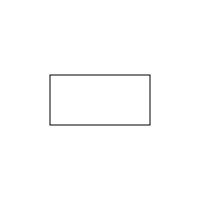

In [4]:
(define (circle r)
  (lambda ()
      (format "<circle r='~a' />" r)))

(define (rectangle w h)
  (lambda ()
      (format "<rect x='~a' y='~a' width='~a' height='~a' />" 
              (/ w -2.0) (/ h -2.0) w h)))



((circle 5))

(render (rectangle 100 50))

Problem: Write a function combine that takes two shapes and returns a new shape.
```
(render 
 (combine 
  (circle 50) 
  (rect 100 100)))
```

In [5]:
(define (combine shape1 shape2) 
      (lambda () (string-append (shape1) (shape2))))

In [6]:
 (combine 
  (circle 50) 
  (rectangle 100 100))

#<procedure>

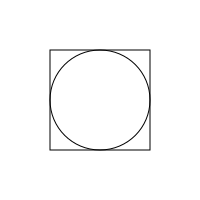

In [7]:
(render  (combine 
  (circle 50) 
  (rectangle 100 100)))

In [8]:
(define (combine-generic-args . shape-list) 
  (lambda () (apply string-append 
               (map (lambda (x) (x)) shape-list))))

In [9]:
(apply + (list 1 2 3))

6

In [10]:
(define (combine-generic shape-list) 
  (lambda () (string-join "\n"
               (map (lambda (x) (x)) shape-list))))

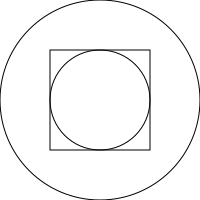

In [11]:
(render (combine-generic (list (circle 50) (rectangle 100 100) (circle 100))))

In [12]:
(map number->string '(1 2 3))

("1" "2" "3")

In [13]:
(apply string-append 
       (map number->string '(1 2 3)))

"123"

In [14]:
(define (concentric-helper r n x) 
      (* (/ r n) x))

(concentric-helper 100 5 5)

100

In [15]:
(define (conc-gen r n x)
    (cond ((= x n) (list (circle r)))
          (else (cons (circle (concentric-helper r n x)) (conc-gen r n (+ x 1))))))

In [16]:
(define (concentric-circles r n) 
  (combine-generic (conc-gen r n 1)))

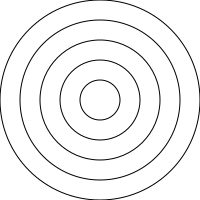

In [17]:
(render (concentric-circles 100 5))

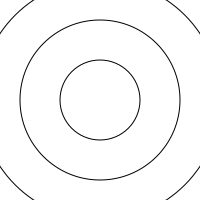

In [18]:
(render (concentric-circles 200 5))

In [19]:
(python.range 1 11)

range(1, 11)

In [20]:
(define (range max-val n)
      (map (lambda (i) (* i (/ max-val n))) (python.range 1 (+ n 1))))

In [21]:
(range 100 5)

(20 40 60 80 100)

In [22]:
(define (concentric-circles-proper r n)
    (combine-generic (map circle (range r n))))

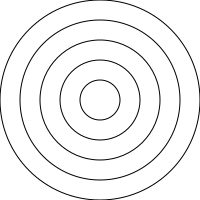

In [23]:
(render (concentric-circles-proper 100 5))

## Transformations

In [24]:
;; transform creates a function that takes a shape 
;; and returns a new shape after applying the given transform
(define (transform t)
  (lambda (shape)
    (lambda ()
      (format "<g transform='~a'>~a</g>" t (shape)))))

In [25]:


(define (rotate angle)
  (transform (format "rotate(~a)" angle)))

(define (translate x y)
  (transform (format "translate(~a, ~a)" x y)))

(define (scale x y)
  (transform (format "scale(~a, ~a)" x y)))



In [26]:
(rotate 45)

#<procedure>



Problem: Write a function compose2 that take two transformations as arguments and combine them into a single transformation.
```
(define (scale-and-rotate scale-factor angle)
  (compose2 
    (scale scale-factor scale-factor)
    (rotate angle)))
```


In [27]:
(define (compose2 f1 f2) 
      (lambda (x) (f2 (f1 x))))

In [28]:
(define (scale-and-rotate scale-factor angle)
  (compose2 
    (scale scale-factor scale-factor)
    (rotate angle)))

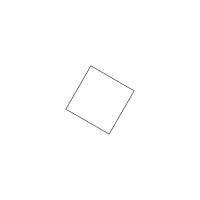

In [29]:
(render ((scale-and-rotate 0.5 30) (rectangle 100 100)))



Problem: Write a function compose that combines list of transformations into a single one.




In [30]:
(define (compose tlist) 
      (cond ((null? tlist) (lambda (x) x))
            (else (compose2 (car tlist) (compose (cdr tlist))))))

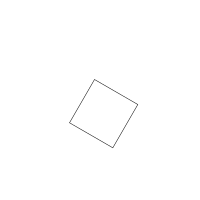

In [31]:
(render ((compose 
          (list 
            (translate 20 20)
            (scale 0.5 0.5)
            (rotate 30))) (rectangle 100 100)))



Problem: Write a function random-circle that takes a max radius as argument and returns a shape that creates a circle with radius as a random number less than equal to the given max radius.
```
(random-circle 100)
```
What happens if you take a random-circle and combine it with it self?
```
(define c (random-circle 100))
(render (combine c c))

```

In [32]:
(define (random-circle r) 
      (lambda ()
          (format "<circle r='~a' />" (random r))))

In [33]:
(random-circle 100)

#<procedure>

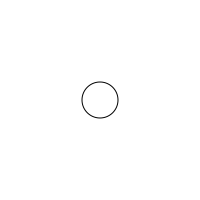

In [34]:
(render (random-circle 100))

In [35]:
(define c (random-circle 100))

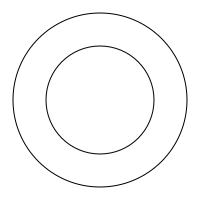

In [36]:
(render (combine c c))

## Repeating a transformation



Problem: Write a function repeat-transform that takes a number n as argument, a transformation, and a shape as arguments and returns the transform repeately to the given shape n times and combines all the intermediate shapes.
```
(repeat-transform 
  5
  (translate 10 0)
  (circle 50))
```


In [37]:
(define (repeat-transform n t shape)
   (cond ((= n 0) ())
         (else (cons (t shape) (repeat-transform (- n 1) t (t shape))))))

In [38]:
(define t (translate 10 0))

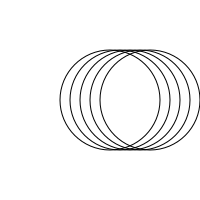

In [49]:
(render (combine-generic(repeat-transform 
                                      5
                                      (translate 10 0)
                                      (circle 50))))



Problem: Write a function repeat that takes a number n and a transformation as argument and returns a new transformation that apples the given transformation repeately to the given shape n times and combines all the intermediate shapes.
```
(define cycle-18 (repeat 18 (rotate 10)))

(render (cycle-18 (rectangle 100 50)))
```


In [50]:
(define (repeat n t) 
      (lambda (x) (fmap (flist-gen n t) x)))

In [51]:
(define (flist-gen n t) 
   (cond ((= n 0) ())
         (else (cons t (flist-gen (- n 1) t)))))

In [52]:
(define (fmap flist x) 
      (cond ((null? flist) ())
            (else (cons ((car flist) x) (fmap (cdr flist) ((car flist) x))))))

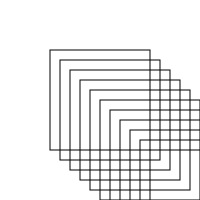

In [53]:
(define (identity x) x)

(define (repeat transform n)
  (if (= n 0)
      identity
      (lambda (shape)
        (combine shape 
                 (transform 
                  ((repeat transform (- n 1)) shape))))))

(render ((repeat (translate 10 10) 10) (rectangle 100 100)))



In [54]:
(define (repeat2 n t) 
      (define (fmap2 f n x) 
          (cond ((= n 0) (list x))
                (else (cons (f x) (fmap2 f (- n 1) (f x))))))
      (lambda (x) (combine-generic (fmap2 t n x))))

In [55]:
(define (dot x) (string-append x "."))
(define (plus x) (string-append x "+"))

In [56]:
(fmap (list dot plus) "x")

("x." "x.+")

In [57]:
(fmap () "x")

()

In [58]:
;; (render (combine-generic ((repeat 18 (rotate 10)) (rectangle 100 50))))

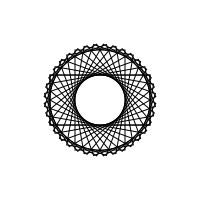

In [59]:
(render ((repeat2 18 (rotate 10)) (rectangle 100 50)))

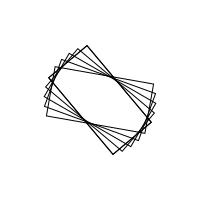

In [60]:
(render ((repeat2 5 (rotate 10)) (rectangle 100 50)))

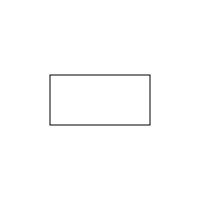

In [61]:
(render ((repeat2 0 (rotate 10)) (rectangle 100 50)))

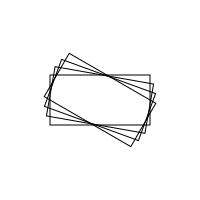

In [62]:
(define c0 (rectangle 100 50))
(define t (rotate 10))

(define c1 (t c0))
(define c2 (t c1))
(define c3 (t c2))

(render (combine-generic (list c0 c1 c2 c3)))



Problem: Write a function pipeline that takes a shape and zero more transformations and applies them one after the other.
```
(pipeline
 (circle 20)
 (translate 75 0)
 (repeat 20 (scale 0.9 0.9))
 (repeat 12 (rotate 30))
 render)
```


In [63]:
(define (pipeline . slist) 
      (cond ((null? slist) ())
            (else ((compose (cdr slist)) (car slist)))))

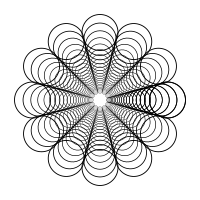

In [64]:
(pipeline
     (circle 20)
     (translate 75 0)
     (repeat2 20 (scale 0.9 0.9))
     (repeat2 12 (rotate 30))
     render
     )

## Functional Geometry



Problem: Implement function beside that takes two shapes a and b and places them one beside the other. Assume each shape take the entire 200x200 canvas and squeeze them appropriately to place them in the 200x200 canvas.
```
(render
  (beside 
    (circle 100)
    (rectangle 100 50)))
```


In [65]:
(define (beside s1 s2) 
      (combine (pipeline 
                    s1
                    (translate -100 0)
                    (scale 0.5 1))
               (pipeline
                    s2
                    (translate 100 0)
                    (scale 0.5 1))))

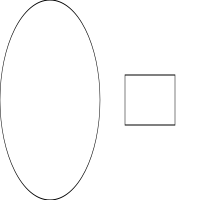

In [66]:
(render
  (beside 
    (circle 100)
    (rectangle 100 50)))



Problem: Implement function below that takes two shapes and places one below another.
```
(render
  (below 
    (circle 100)
    (rectangle 100 50)))
```


In [67]:
(define (below s1 s2) 
      (combine (pipeline 
                    s1
                    (translate 0 -100)
                    (scale 1 0.5))
               (pipeline
                    s2
                    (translate 0 100)
                    (scale 1 0.5))))

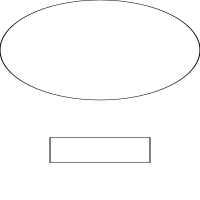

In [68]:
(render
  (below 
    (circle 100)
    (rectangle 100 50)))



Problem Implement function quartlet that takes 4 shapes p, q, r and s and places them in a 2x2 grid.
```
quartlet(p, q, r, s)

+---+---+
| p | q |
+---+---+
| r | s |
+---+---+
```



In [69]:
(define (quartlet p q r s) 
      (below (beside p q) (beside r s)))

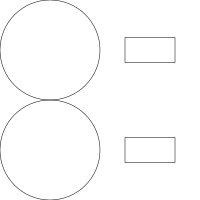

In [70]:
(render (quartlet 
     (circle 100)
     (rectangle 100 50)
     (circle 100)
     (rectangle 100 50)))

In [71]:


(define (line x1 y1 x2 y2)
  (lambda () 
    (format "<line x1='~a' y1='~a' x2='~a' y2='~a' />" x1 y1 x2 y2)))

(define (render-debug shape)
  (render (apply combine-generic-args 
                 (list   
                  shape 
                  (rectangle 200 200)
                  (line -100 0 100 0)
                  (line 0 -100 0 100)))))



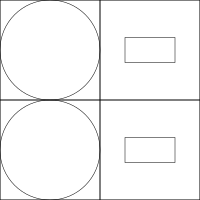

In [72]:
(render-debug (quartlet 
     (circle 100)
     (rectangle 100 50)
     (circle 100)
     (rectangle 100 50)))

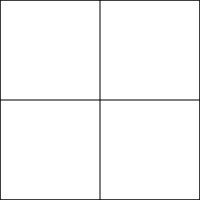

In [73]:
(render-debug (rectangle 200 200))

In [74]:
(define (identity x) x)

In [75]:
(define (cycle-4) 
      (lambda (x) (quartlet x x x x)))

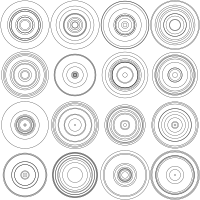

In [76]:
(render (pipeline
     (random-circle 100)
     (repeat2 10 identity)
     (cycle-4)
     (cycle-4)
     ))

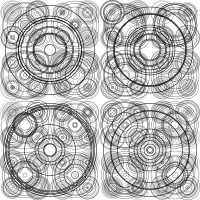

In [81]:
(render (pipeline
     (random-circle 100)
     (repeat2 10 identity)
     ;; (cycle-4)
     ;; (cycle-4)
     (repeat2 3 (cycle-4))
     ))

# Day 2

In [71]:
(define (beside s1 s2) 
      (combine (pipeline 
                    s1
                    (translate -100 0)
                    (scale 0.5 1))
               (pipeline
                    s2
                    (translate 100 0)
                    (scale 0.5 1))))

(define (below s1 s2) 
      (combine (pipeline 
                    s1
                    (translate 0 -100)
                    (scale 1 0.5))
               (pipeline
                    s2
                    (translate 0 100)
                    (scale 1 0.5))))

In [79]:
(define (blank) (lambda () ""))

In [92]:
(define (right-split-1 shape) 
      (beside shape (below (beside shape (blank)) (beside shape (blank)))))

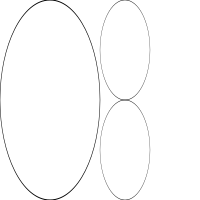

In [93]:
(render (right-split-1 (circle 100)))



Problem: Implement right-split.
```
(right-split shape 5)

((right-split 5)

right-split n

+-----+-----+
|     | RS  |
|     | n-1 |
+   X +-----+
|     |     |
|     |     |
+-----+-----+
```


In [94]:
(define (right-split shape n) 
      (cond ((= n 0) (blank))
            (else (beside shape (below (right-split shape (- n 1)) (right-split shape (- n 1)))))))

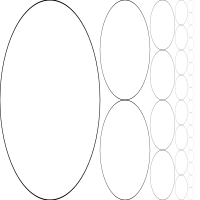

In [99]:
(render (right-split (circle 100) 5))

In [112]:
(define (up-split shape n) 
      (cond ((= n 0) (blank))
            (else (below (beside (up-split shape (- n 1)) (up-split shape (- n 1))) shape))))

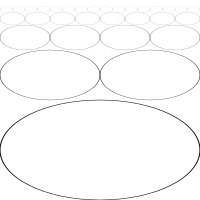

In [113]:
(render (up-split (circle 100) 5))

In [120]:
(define (corner-split shape n) 
      (cond ((= n 0) (blank))
            (else (quartlet 
                       (beside (up-split shape (- n 1)) (up-split shape (- n 1))) 
                       (corner-split shape (- n 1)) 
                       shape 
                       (below (right-split shape (- n 1)) (right-split shape (- n 1)))))))

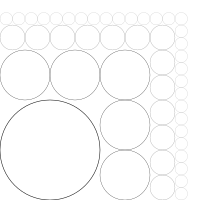

In [125]:
(render (corner-split (circle 100) 5))

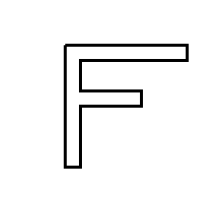

In [127]:
(define (path d)
  (lambda () 
    (format "<path d='~a' />" d)))

(define (filled-path d)
  (lambda () 
    (format "<path fill='black' d='~a' />" d)))

(define f 
  (pipeline
  (path 
   "M5.08,5.08 L 45.72 5.08 45.72 10.16 10.16 10.16 10.16 20.32 30.48 20.32 30.48 25.4 10.16 25.4 10.16 45.72 5.08 45.72 5.08 5.08"
   )
   (scale 3.0 3.0)
   (translate -50 -70)))

(render f)



Primitives:

    flip - flip along vertical axis
    rot - rotate 90 degrees anti-clockwise
    rot45 - ?



rot45 is tricky.

    rotate by 45 degrees around the top-left corner
    and scale it down by $\sqrt{2}$.



In [171]:
(define flip (scale -1 1))

(define rot (rotate -90))

(define over combine)

(define (compose3 t1 t2 t3)
  (lambda (shape) (t1 (t2 (t3 shape)))))

(define (compose4 t1 t2 t3 t4)
  (lambda (shape) (t1 (t2 (t3 (t4 shape))))))

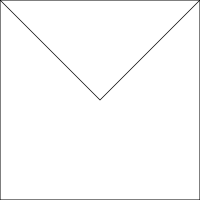

In [154]:
(define 1/SQRT2 (/ 1 (math.sqrt 2)))
(define rot45 
  (compose4
   (translate -100 -100)   
   (scale 1/SQRT2 1/SQRT2)
   (rotate -45)
   (translate 100 100)))

(define r (rectangle 200 200))

(render (combine r (rot45 r)))



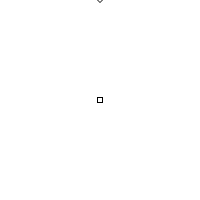

In [149]:

(define r (rectangle 5 5))

(render (combine r (rot45 r)))

The fish

In [167]:
(define fish_path
  "M -4.2207441,256.03034 C -28.145511,234.64868 -48.352478,216.63385 -64.254835,194.25807 c 0,-0.98162 1.409231,-4.58443 3.131624,-8.00625 9.780189,-19.42994 18.510553,-32.02794 40.347284,-58.22148 l 11.6713579,-14 -0.5810892,-5.95367 C -12.866405,70.238313 -11.000232,42.188243 -1.6245701,6.280326 -0.44826504,-4.552565 2.1569119,1.0296139 16.04983,11.409158 31.80326,24.108892 46.438782,31.394353 61.228466,55.314218 l 18.47934,0.80424 c 21.018664,0.914754 29.546174,2.279685 41.537354,6.120755 l 9,2.88293 c 0.0945,11.792891 0.18906,23.585782 0.28359,35.378677 0.0814,10.15961 0.16287,20.31922 0.24431,30.47883 -10.50136,10.51677 -21.58698,23.07846 -32.08834,33.59523 14.06059,22.8839 52.10904,35.64861 85.22757,39.00203 l 13.66713,1.22844 9.56869,11.23743 c 10.78341,12.66401 17.40255,18.3707 36.09705,31.12106 l 13,8.8665 c 1.33842,0.7382 8.30977,4.88574 -1.5,3.88201 l -19.25,-3.68746 c -26.32015,-5.0418 -38.48678,-6.65619 -50.25,-6.66768 -9.38398,-0.009 -27.96557,1.23366 -37.02773,2.47659 -3.87372,0.5313 -4.40901,0.2337 -14,-7.78357 -29.85673,-24.95774 -39.871065,-32.158 -58.505535,-42.06515 l -10.53326,-5.60009 c -20.811164,20.81902 -41.622317,41.63804 -62.4334701,62.45707 -2.21316496,3.12868 -6.965909,-3.01172 -6.965909,-3.01172 z M 61.803945,194.95944 C 50.531083,188.98956 40.40126,183.25734 27.305528,175.34765 l -6.754753,6.47832 c -3.536929,3.39218 -10.53586,8.30385 -14.4839431,12.21821 -6.31395894,6.26003 -7.939397,8.70463 -13.498717,20.30159 -5.7692039,12.03478 -8.8304989,16.00434 -8.8182649,11.43457 0.008,-3.00548 11.4878289,-25.49609 15.74548296,-30.84775 C 1.7259409,192.12882 8.372517,186.3979 14.097255,181.97548 l 10.741024,-8.29756 c -4.207436,-3.82316 -8.004154,-7.27638 -11.339194,-10.98081 -1.24991,-0.5529 -17.0361021,12.2674 -22.5955641,18.35034 -2.8578029,3.12689 -8.6443609,11.26473 -12.8590179,18.08407 -7.041702,11.39353 -10.299338,14.82367 -10.299338,10.84471 0,-2.03202 11.995257,-21.24309 18.142644,-29.05646 2.644213,-3.36081 8.4833679,-8.98581 12.9758999,-12.5 4.492532,-3.51418 11.4432581,-8.3652 12.5847181,-9.26519 C 1.4377364,142.53161 -1.7064185,131.95557 -7.8508061,118.29212 l -14.0058249,17.06987 c -18.407479,22.43447 -23.802822,30.06405 -32.294897,45.66835 l -7.074778,13 c 5.999036,4.93102 41.372597,48.14728 61.97156998,61.5 C 22.561403,234.48013 38.760552,218.01213 61.803945,194.95944 z M -7.2548351,242.51953 C 3.2541256,226.12534 26.190195,194.2622 40.413595,185.53034 c -9.194645,15.38335 -30.067556,33.10097 -41.24502108,52.79312 -1.78332402,3.17503 -3.60588202,5.20524 -4.67340902,5.20586 -0.9625,5.6e-4 -1.75,-0.45384 -1.75,-1.00979 z M -45.254835,197.45001 c 0,-2.02853 11.205169,-22.9919 14.961761,-27.99146 6.316815,-7.86762 33.3296708,-35.18953 34.2312897,-27.04427 -16.6533327,10.47874 -36.2675407,32.23172 -43.0855567,49.86606 -1.733518,3.45456 -3.800751,6.25 -4.621889,6.25 -0.817083,0 -1.485605,-0.48615 -1.485605,-1.08033 z m 281.223395,49.32353 c -16.53242,-11.55112 -26.48235,-20.87994 -37.90361,-35.53751 -2.12475,-2.72682 -2.61988,-2.84067 -20.49857,-4.71335 -41.29693,-3.67905 -79.727773,-25.41347 -90.359285,-56.99234 -19.418393,-48.4311 -8.034463,-84.647267 -52.96193,-120.882837 -3.85,-3.16484 -12.6884,-9.65735 -19.6409,-14.4278 L 1.9633729,5.546172 C -9.641588,46.319455 -11.246694,88.443563 -3.8678647,116.69064 c 4.9485443,18.94364 13.9120427,37.55338 27.6414417,49.58108 20.120295,17.62647 74.865213,36.73222 121.471583,82.30002 l 5.5,-0.51387 c 35.04438,-3.27426 45.67213,-2.87049 76,2.88739 9.625,1.82735 18.13568,3.38155 18.91262,3.45377 0.77694,0.0722 -3.58321,-3.35925 -9.68922,-7.62549 z m -57.7234,-17.58865 C 114.84075,203.60146 97.505663,195.44895 80.066053,177.92482 57.002968,150.78367 43.835211,120.86796 30.637475,88.018981 c -6.662998,-24.866011 4.774135,2.895003 8.281419,11.775776 8.22961,20.553433 17.512392,34.863533 24.628245,47.993013 20.033752,36.96433 47.128131,51.04988 125.448021,81.72205 13.00195,5.09191 20.75,8.77958 20.75,9.64164 0,0.75839 -0.7875,1.36818 -1.75,1.3551 -0.9625,-0.0131 -14.35,-5.10783 -29.75,-11.32167 z M 4.4664931,85.774195 C 3.8384406,80.865818 2.1039515,45.709369 8.8642806,44.240948 c 1.5155094,-0.253205 3.1525274,2.067688 4.6947584,5.369471 2.976272,6.371935 5.599528,16.397006 6.315175,18.624249 l 2.10273,8.577367 C 14.495321,81.740921 8.8564089,88.629661 6.7080086,88.3433 5.533146,88.475127 4.8579884,87.595736 4.4664931,85.774195 z M 6.8906482,84.102279 C 10.86679,80.232388 16.962726,77.10653 19.148649,75.152542 14.409646,54.995888 10.892524,47.229403 9.2075279,48.095515 6.4848717,58.109433 6.2541696,70.750092 6.8906482,84.102279 z M 22.664175,38.938253 c 2.772591,-2.483362 26.930795,19.823141 26.930795,22.472621 0,0.544116 -4.38678,3.089995 -9.230553,5.341842 -3.531321,1.641695 -8.558047,4.018164 -9.380188,4.018164 -2.412811,-2.264133 -9.47291,-30.407563 -8.320054,-31.832627 z m 3.300748,4.243751 c -1.891754,-1.32108 3.510607,18.073228 5.716434,24.267649 8.013578,-2.283375 14.353163,-6.99971 14.253502,-7.312251 C 40.984785,54.946039 29.523328,44.769161 25.964923,43.182004 z m 62.865352,88.348336 c -2.49329,0 -0.721904,-3.04198 4.88639,-8.3914 2.278533,-2.17336 4.28533,-3.88722 6.244053,-5.23383 4.996562,-3.4351 9.680292,-4.48041 17.763912,-4.66701 l 9.00008,-0.20776 c -0.0614,-4.14133 0.34883,-9.82321 -0.75824,-13.136793 -0.42827,0.264693 -5.54093,-1.408851 -9.10016,-2.171765 -10.50631,-2.25198 -13.47316,-1.200361 -21.662504,2.724298 -7.83663,3.75561 -9.458661,4.83971 -9.458661,2.78448 0,-0.71487 3.65458,-3.07737 8.1213,-5.250017 7.348095,-3.57414 8.799985,-3.9334 15.249995,-3.77359 3.92078,0.0971 9.43266,1.079694 12.3787,1.60352 l 5.83426,1.037372 c 0.0748,-1.197325 0.20337,-3.375755 0.30518,-5.687864 0.15696,-3.564397 0.25022,-7.446495 -0.0157,-8.541485 -8.45958,-3.945156 -18.33598,-7.165029 -26.14755,-7.281232 -8.302223,-0.123502 -15.834295,0.03183 -21.977331,2.568846 -2.732244,1.128391 -4.259138,3.003355 -6.387368,5.259062 3.477717,14.490596 12.237245,68.186238 23.552176,78.582448 9.898943,-9.88246 20.187423,-21.80983 30.086383,-31.69227 1.92823,-6.78475 0.64872,-13.84968 -0.47808,-14.03878 -19.55293,-4.48221 -31.455088,8.48165 -37.436805,15.51377 z m 37.914885,-63.682657 -5.3846,-1.904158 -10.02638,-3.54563 C 106.6178,60.73004 102.11572,59.915418 97.181611,59.40953 91.454934,58.822382 85.146286,58.651119 77.245165,58.044453 72.845164,57.706611 63.85389,57.609461 62.62028,57.352487 c 1.249729,2.634372 2.75999,5.563313 4.220937,8.583427 2.242502,4.635769 4.368816,9.486354 5.258373,13.816167 6.91308,-4.693346 13.461538,-6.044705 19.713742,-6.578177 7.392558,-0.657693 16.135208,0.882942 22.955088,2.544154 5.87105,1.430094 10.31713,2.949548 11.25016,3.232765 1.13687,0.345092 1.29474,-1.221868 1.18082,-3.550245 -0.10603,-2.167253 -0.44755,-4.994189 -0.45424,-7.552895 z m 12.64676,114.545847 c -2.90282,-0.74731 -6.91418,-3.14668 -10.30114,-6.06993 -1.91717,-1.65469 -3.63427,-3.47725 -4.83701,-5.26305 -1.01961,-1.51389 -1.66956,-3.00137 -1.75838,-4.33778 -0.27291,-3.21807 4.23116,3.9643 7.47286,7.26654 1.06762,1.13916 2.53717,2.1524 4.11935,3.08677 3.08048,1.81922 6.58789,3.33942 8.38683,4.90772 -0.069,0.73412 -1.15751,1.23822 -3.08251,0.40973 z m -1.57762,-18.53569 c -1.06389,-0.64878 -1.93526,-1.10287 -2.83379,-2.28729 -1.06757,-1.40726 -1.97908,-3.0679 -2.64102,-4.68559 -1.45362,-3.55248 -2.39222,-6.76012 -0.44843,-6.76012 0.4823,0 1.29583,1.99069 2.05446,3.94922 0.51683,1.33427 1.00818,2.65362 1.35198,3.31844 0.84844,1.64069 2.88499,3.67725 4.52568,4.52568 0.77517,3.93209 -1.33538,2.36354 -2.00888,1.93966 z"
  )

(define fish 
  (pipeline 
   (filled-path fish_path)
   (translate -130 -130)
   (scale (/ 200 260.0) (/ 200 260.0))
))



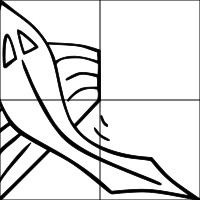

In [168]:
(render-debug fish)

In [172]:
(define fish2 (flip (rot45 fish)))
(define fish3 (rot (rot (rot fish2))))

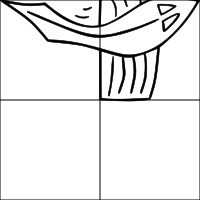

In [174]:
(render-debug fish2)

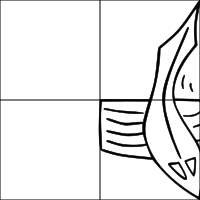

In [173]:
(render-debug fish3)

In [176]:
(define t (over fish (over fish2 fish3)))

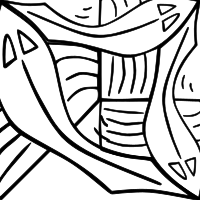

In [178]:
(render t)

In [181]:
(define u (over fish2 (over (rot fish2) (over (rot (rot fish2)) fish3))))

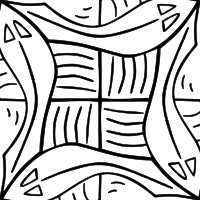

In [182]:
(render u)

In [183]:
(define _ (blank))

In [196]:
(define (side n)
    (cond ((= n 0) _)
          (else 
               (below
                    (beside (side (- n 1)) (side (- n 1)))
                    (beside (rot t) t)))))

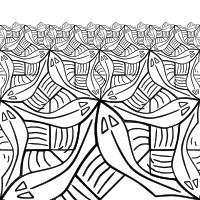

In [198]:
(render (side 3))

In [206]:
(define (corner n) 
      (cond ((= n 0) _)
            (else 
                 (quartlet
                      (corner (- n 1))
                      (side (- n 1))
                      (rot (side (- n 1)))
                      u)))) 

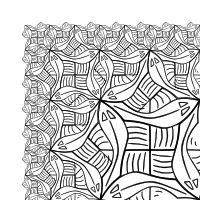

In [207]:
(render (corner 3))

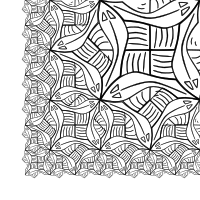

In [208]:
(render (rot (corner 3)))

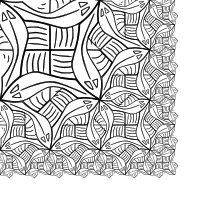

In [210]:
(render (rot (rot (corner 3))))

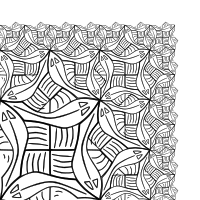

In [212]:
(render (rot (rot (rot (corner 3)))))

In [ ]:
(define (beside s1 s2) 
      (combine (pipeline 
                    s1
                    (translate -100 0)
                    (scale 0.5 1))
               (pipeline
                    s2
                    (translate 100 0)
                    (scale 0.5 1))))

In [270]:
(define (beside3 s1 s2 s3) 
      (combine-generic-args
               (pipeline
                    s1
                    (scale (/ 1 3.0) 1)
                    (translate (- (/ 200 3.0)) 0))
               (pipeline
                    s2
                    (scale (/ 1 3.0) 1))
               (pipeline
                    s3
                    (scale (/ 1 3.0) 1)
                    (translate (/ 200 3.0) 0))))

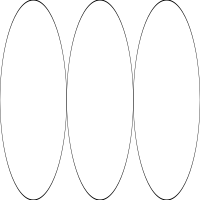

In [271]:
(render (beside3 (circle 100) (circle 100) (circle 100)))

In [272]:
(define (below3 s1 s2 s3) 
      (combine-generic-args
               (pipeline
                    s1
                    (scale 1 (/ 1 3.0))
                    (translate 0 (- (/ 200 3.0))))
               (pipeline
                    s2
                    (scale 1 (/ 1 3.0)))
               (pipeline
                    s3
                    (scale 1 (/ 1 3.0))
                    (translate 0 (/ 200 3.0)))))

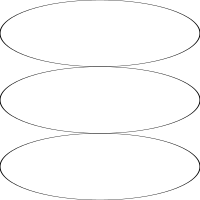

In [273]:
(render (below3 (circle 100) (circle 100) (circle 100)))

In [274]:
(define (nonet s1 s2 s3 s4 s5 s6 s7 s8 s9) 
    (below3 
         (beside3 s1 s2 s3)
         (beside3 s4 s5 s6)
         (beside3 s7 s8 s9)))

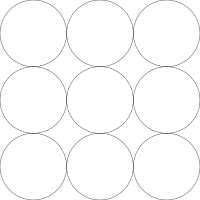

In [275]:
(render (nonet (circle 100) (circle 100) (circle 100) (circle 100) (circle 100) (circle 100) (circle 100) (circle 100) (circle 100)))

In [276]:
(define (square-limit n) 
      (if (= n 0) _
      (nonet
           (corner (- n 1))
           (side (- n 1))
           (rot (rot (rot (corner (- n 1)))))
           (rot (side (- n 1)))
           u
           (rot (rot (rot (side (- n 1)))))
           (rot (corner (- n 1)))
           (rot (rot (side (- n 1))))
           (rot (rot (corner (- n 1)))))))

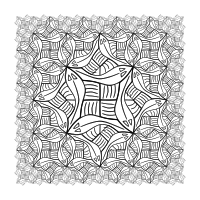

In [277]:
(render (square-limit 3))

## Alternate representation

In [ ]:
(define (render-svg-text w h shape)
    (string-append
         (format 
          "<svg version='1.1' viewBox='~a ~a ~a ~a' width='~a' height='~a' fill='none' stroke='black' xmlns='http://www.w3.org/2000/svg'>"
          (/ w -2.0)
          (/ h -2.0)
          w
          h
          w
          h)
         (shape)
         "</svg>"))

(define (render-svg w h shape)
  (SVG (render-svg-text w h shape)))

(define (render shape)
  (render-svg 200 200 shape))

In [293]:
(define (circle r)
  (lambda ()
      (format "<circle r='~a' />" r)))

(define (rectangle w h)
  (lambda ()
      (format "<rect x='~a' y='~a' width='~a' height='~a' />" 
              (/ w -2.0) (/ h -2.0) w h)))



((circle 5))

(render (rectangle 100 50))

;; transform creates a function that takes a shape 
;; and returns a new shape after applying the given transform
(define (transform t)
  (lambda (shape)
    (lambda ()
      (format "<g transform='~a'>~a</g>" t (shape)))))



(define (rotate angle)
  (transform (format "rotate(~a)" angle)))

(define (translate x y)
  (transform (format "translate(~a, ~a)" x y)))

(define (scale x y)
  (transform (format "scale(~a, ~a)" x y)))



In [295]:
(define (circle-alt x) (list 'circle r))
(define (rectangle-alt w h) (list 'rectangle w h))

In [290]:
(define (iscircle? shape-alt) 
      (= (car shape-alt) 'circle))

(define (isrectangle? shape-alt) 
      (= (car shape-alt) 'rectangle))

In [291]:
;; (define (format-alt shape-alt) 
;;       (cond ((iscircle? shape-alt) (lambda ()
;;                                           (format "<circle r='~a' />" (cadr shape-alt))))
;;             ((isrectangle? shape-alt)(lambda ()
;;                                           (format "<rect x='~a' y='~a' width='~a' height='~a' />" 
;;                                                   (/ (cadr shape-alt) -2.0) (/ (caddr shape-alt) -2.0) (cadr shape-alt) (caddr shape-alt))))
;;             (else "")))

In [292]:
;; (define (transform-alt t)
;;   (lambda (shape)
;;     (lambda ()
;;       (format "<g transform='~a'>~a</g>" t (format-alt shape)))))

In [297]:
(define (rotate-circle c angle) 
      ((let (x (cadr c))
             (y (caddr c))
             (r (cadddr c)))
      c))

In [296]:
(define (translate-circle c xtr ytr) 
      ((let (x (cadr c))
             (y (caddr c))
             (r (cadddr c)))
      (circle-alt (+ x xtr) (+ y ytr) r)))

In [ ]:
(define (scale-circle c x y) 
      ((let (r (cadr c)))
      ()))